# Funciones de distribución de probabilidades

## Distribución uniforme

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100483.,  99989., 100192., 100173.,  99765.,  99754.,  98985.,
        100410., 100176., 100073.]),
 array([ 1.00003561, 10.90002083, 20.80000606, 30.69999128, 40.59997651,
        50.49996173, 60.39994696, 70.29993218, 80.19991741, 90.09990263,
        99.99988786]),
 <BarContainer object of 10 artists>)

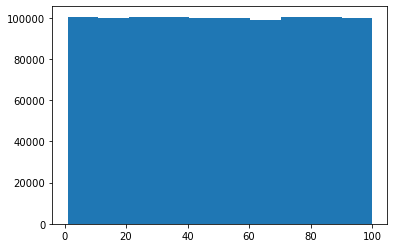

In [14]:
%matplotlib inline
plt.hist(data)

## Distribución normal

In [20]:
data2 = np.random.randn(1000)

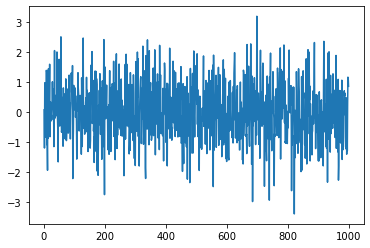

In [21]:
x = range(1,1001)
y = data2
plt.plot(x,y)

(array([  4.,  12.,  41., 160., 239., 257., 178.,  74.,  34.,   1.]),
 array([-3.4027511 , -2.74223799, -2.08172487, -1.42121176, -0.76069864,
        -0.10018553,  0.56032758,  1.2208407 ,  1.88135381,  2.54186693,
         3.20238004]),
 <BarContainer object of 10 artists>)

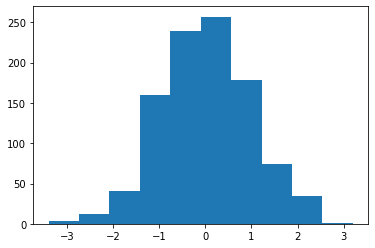

In [22]:
plt.hist(data2)

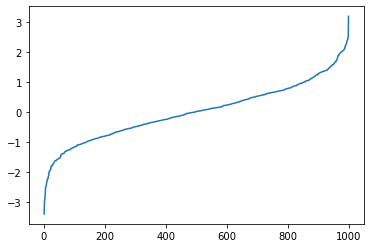

In [24]:
plt.plot(x,sorted(data2))

(array([  22.,  109.,  571., 1630., 2801., 2657., 1539.,  532.,  127.,
          12.]),
 array([-3.86516412, -1.98511925, -0.10507437,  1.77497051,  3.65501538,
         5.53506026,  7.41510513,  9.29515001, 11.17519488, 13.05523976,
        14.93528464]),
 <BarContainer object of 10 artists>)

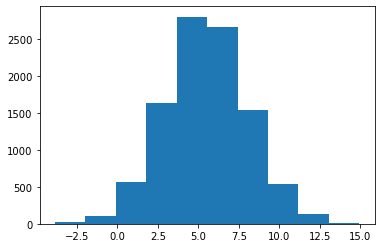

In [27]:
# mu = media
# sd = desviación típica
# Z = normal estándar
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)

data3 = mu+sd*Z # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data3)

In [28]:
# np.random.randn(arrays,elementos)
data4 = np.random.randn(2,4)
data4 

array([[-0.87658506,  0.08913133, -1.36700686, -1.45294997],
       [ 0.15545433,  0.21521788,  1.17814019,  0.39905487]])

In [29]:
# np.random.randn(elementos)
data5 = np.random.randn(2)
data5

array([0.80762394, 0.58030327])

In [31]:
# np.random.randn() = 1 solo elemento
data6 = np.random.randn()
data6 

-0.605157313253744